In [1]:
# import statement
# import jax
import matplotlib.pyplot as plt
import math
import time
import numpy as np
import plotly.graph_objs as go
# import jax.numpy as jnp
# import numpy as np

In [2]:
# pip install -U "jax[cpu]"

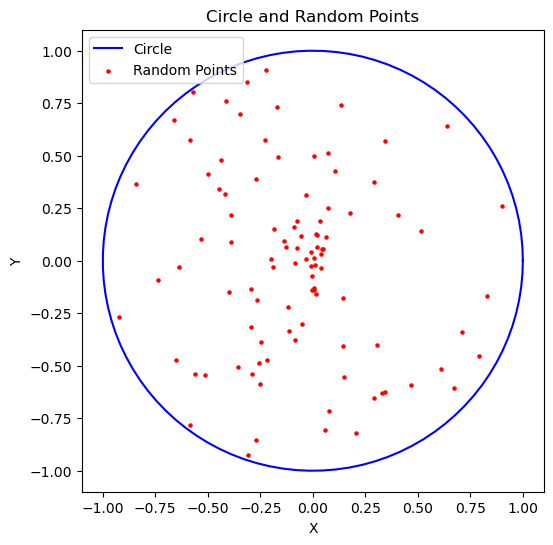

In [3]:

def random_points(n):
    # Generate random spherical coordinates
    theta = np.random.uniform(0, 2 * np.pi, n)
    r = np.random.uniform(0, 1, n)

    # Convert spherical coordinates to Cartesian coordinates
    x = np.cos(theta) * r
    y = np.sin(theta) * r

    return np.array([x, y]).T

def random_points_on_circle(x,y,n,r):
    # Generate random spherical coordinates
    theta = np.random.uniform(0, 2 * np.pi, n)

    # Convert spherical coordinates to Cartesian coordinates
    x += np.cos(theta)*r
    y += np.sin(theta)*r

    return np.array([x, y]).T

n = 100  # Number of random points
points = random_points(n)
# points = random_points_on_circle(0.5,0.5,n,0.5)


# Generate points for the circle
theta_circle = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta_circle)
y_circle = np.sin(theta_circle)

# Plot the circle and the random points
plt.figure(figsize=(6, 6))
plt.plot(x_circle, y_circle, color='blue', label='Circle')
plt.scatter(points[:, 0], points[:, 1], s=5, color='red', label='Random Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Circle and Random Points')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

In [5]:
# our dummy h function
def our_function(x,y):
    return (np.exp(x)*np.sin(y))

# distance function
def d(v1, v2):
    return np.linalg.norm(v1,v2)

# given center x,y and radius r, return a random point on the circle boundary
def rand_point(x,y,r):
    theta = np.random.uniform(0, 2 * np.pi)
    # Convert spherical coordinates to Cartesian coordinates
    return x + np.cos(theta) * r, y + np.sin(theta) * r

# projection of point x,y on the circle
def proj_c(x,y):
    r = np.sqrt(x**2 + y**2)
    return x/r , y/r



In [17]:
# experiment with one point
# pick random point
k =0
x,y = points[k][0], points[k][1]

print(f"my point is: {x}, {y} and so clearly my r = {np.sqrt(x**2 + y**2)}")
z_anal = our_function(x,y)
# set parameters
max_iters, eps = 100000, 0.001
start = time.time()
value = 0
iterations = np.array([10**i for i in range(1,8)])
# print( np.sum((5 % iterations) == 0) )

for i in range(max_iters):
    x,y = points[k][0], points[k][1]
    r = np.sqrt(x**2 + y**2)
    while 1-r > eps:
        x,y = rand_point(x,y,1-r)
        r = np.sqrt(x**2 + y**2)
        
    value += our_function( x/r, y/r) # projection to the edge

    if np.sum(iterations == i) != 0:
        numerical_value = value/(i+1)
        diff = np.abs(z_anal - numerical_value)
        print(f"num_iters = {i} and error = {diff}")
        print(f"x,y,r = {x,y,r}")
        print(f"time taken = {(time.time() - start) :.2f}")

    # numerical_value = value/(i+1)
    # diff = np.abs(z_anal - numerical_value)
    # print(f"num_iters = {i} and error = {diff}")
    # print(f"time taken = {(time.time() - start) :.2f}")

#final print
numerical_value = value/max_iters
diff = np.abs(z_anal - numerical_value)
print(f"num_iters = {max_iters} and error = {diff}")
print(f"time taken = {(time.time() - start) :.2f}")


my point is: -0.13881080194338496, 0.09539262061862631 and so clearly my r = 0.16842859259833176
num_iters = 10 and error = 0.18926846954975274
x,y,r = (0.8013934900264862, 0.5981119416586368, 0.999984710188859)
time taken = 0.00
num_iters = 100 and error = 0.041719084438063575
x,y,r = (-0.11599802744301028, 0.9932233765715278, 0.9999741087342293)
time taken = 0.01
num_iters = 1000 and error = 0.004368938070077669
x,y,r = (-0.4482625676371274, -0.893717667461327, 0.9998352857731844)
time taken = 0.10
num_iters = 10000 and error = 0.00863796310559134
x,y,r = (0.030111085225846553, 0.9994969069804853, 0.9999503710270001)
time taken = 1.23
num_iters = 100000 and error = 0.0016169613858431908
time taken = 13.32


We found that time taken increases linearly for number of interations and the error is pretty good with 10000 iterations (0.008), amazing with 100000 (0.001) and good with 1000 (0.004)

In [22]:
#### for lots of points
max_iters, eps = 1000, 0.001
start = time.time()
errors = []
z_numerical = []
z_analytical = []
x_vals = []
y_vals = []


# pick random point
for k in range(len(points)):
    x,y = points[k][0], points[k][1]
    print(f"my point is: {x}, {y} and so clearly my r = {np.sqrt(x**2 + y**2)}")
    z_anal = our_function(x,y)
    z_analytical.append(z_anal)
    
    start = time.time()
    value = 0

    for i in range(max_iters):
        x,y = points[k][0], points[k][1]
        r = np.sqrt(x**2 + y**2)
        while 1-r > eps:
            x,y = rand_point(x,y,1-r)
            r = np.sqrt(x**2 + y**2)
            
        value += our_function( x/r, y/r)

    #final print
    numerical_value = value/max_iters
    diff = np.abs(z_anal - numerical_value)
    # print(f"point at {k} gives error {diff}")
    # print(f"numerical_val= {numerical_value} and anal_val= {z_anal}")
    # print(f"time taken = {(time.time() - start) :.2f}")

    z_numerical.append(numerical_value)

    errors.append(diff)


my point is: -0.13881080194338496, 0.09539262061862631 and so clearly my r = 0.16842859259833176
point at 0 gives error 0.02948229068658975
numerical_val= 0.11238546363957376 and anal_val= 0.08290317295298401
time taken = 0.11
my point is: -0.5830885187393149, 0.5730265709320134 and so clearly my r = 0.8175277803718416
point at 1 gives error 0.012485007243811908
numerical_val= 0.31511326788480915 and anal_val= 0.30262826064099724
time taken = 0.13
my point is: 0.14397688170349437, -0.40669782110247427 and so clearly my r = 0.43143071304041647
point at 2 gives error 0.02031808602496943
numerical_val= -0.436518864325025 and anal_val= -0.45683695034999444
time taken = 0.12
my point is: 0.03274719037762127, 0.19140307082094943 and so clearly my r = 0.19418422695295712
point at 3 gives error 0.02305062331362928
numerical_val= 0.21961999069105245 and anal_val= 0.19656936737742317
time taken = 0.11
my point is: 0.01779153337785849, 0.12118721671884927 and so clearly my r = 0.12248624476240912

In [21]:
# Plotting results

# Generate data within the unit circle
theta = np.linspace(0, 2*np.pi, 50)
r = np.linspace(0, 1, 50)
theta, r = np.meshgrid(theta, r)
x = r * np.cos(theta)
y = r * np.sin(theta)
z = our_function(x, y)

# Create another set of discrete points
x_points = points[:,0]
y_points = points[:,1]
z_points = z_numerical

# print(x_points, y_points, z_points)

# Create 3D surface plot
fig = go.Figure(data=[go.Surface(x=x, y=y,z = z, colorscale='viridis')])

# Add scatter plot for discrete points
fig.add_trace(go.Scatter3d(x=x_points, y=y_points, z=z_numerical, mode='markers', marker=dict(size=2, color='red'), name='Discrete Points'))

# fig.add_trace(go.Scatter3d(x=x_vals, y=y_vals, z=z_analytical, mode='markers', marker=dict(size=10, color='blue'), name='Discrete Points'))

# Update layout
fig.update_layout(title='Interactive 3D Plot with Discrete Points')

# Show plot
fig.show()



In [27]:
def whole_exp(n=100):
    # generate n many random points
    points = random_points(n)

    max_iters, eps = 1000, 0.001
    z_numerical = []
    z_analytical = []
   
    # pick random point
    for k in range(len(points)):
        x,y = points[k][0], points[k][1]
        z_anal = our_function(x,y)
        z_analytical.append(z_anal)
    
        value = 0

        for _ in range(max_iters):
            x,y = points[k][0], points[k][1]
            r = np.sqrt(x**2 + y**2)
            while 1-r > eps:
                x,y = rand_point(x,y,1-r)
                r = np.sqrt(x**2 + y**2)
                
            value += our_function( x/r, y/r)

        #final print
        numerical_value = value/max_iters
        z_numerical.append(numerical_value)
    
    # Plotting results
    # Generate data within the unit circle
    theta = np.linspace(0, 2*np.pi, 50)
    r = np.linspace(0, 1, 50)
    theta, r = np.meshgrid(theta, r)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = our_function(x, y)

    # Create another set of discrete points
    x_points = points[:,0]
    y_points = points[:,1]

    # Create 3D surface plot
    fig = go.Figure(data=[go.Surface(x=x, y=y,z = z, colorscale='viridis')])

    # Add scatter plot for discrete points
    fig.add_trace(go.Scatter3d(x=x_points, y=y_points, z=z_numerical, mode='markers', marker=dict(size=2, color='red'), name='Discrete Points'))

    # Update layout
    fig.update_layout(title='n = '+ str(n))

    fig.write_html("./function_points_"+str(n)+".html")
    # Show plot
    fig.show()


In [28]:
# time grows linearly
whole_exp(100) # 6 seconds
whole_exp(1000) # 1 min
whole_exp(10000) # 5 mins

